# Education Project

---



This project explores educational inequality in U.S. high schools by analyzing how average ACT and SAT scores vary across schools and whether these differences are linked to socioeconomic factors.



---





Let us start by importing the needed libraires.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

print ('Imported!')

Imported!


Loading the data

1. Edgap Data

In [ ]:
# Load the EdGap dataset from your GitHub repo
edgap = pd.read_excel(
    "https://raw.githubusercontent.com/anushkanaidu/Education-Project-/main/Education/Data/EdGap_data.xlsx",
    dtype={'NCESSCH School ID': object}
)

# Display the first few rows
edgap.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


2. School Info Data

- uploading it from the dropbox (since, it is a large file)

In [ ]:
!wget -O ccd_sch_029_1617_w_1a_11212017.csv "https://www.dropbox.com/scl/fi/kvsmqdymab4u7uayxjmjv/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=2k3g0ujm3c6hz7a5q4fb4ywt9&dl=1"

--2025-10-09 21:51:45--  https://www.dropbox.com/scl/fi/kvsmqdymab4u7uayxjmjv/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=2k3g0ujm3c6hz7a5q4fb4ywt9&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ccd_sch_029_1617_w_1a_11212017.csv’

ccd_sch_029_1617_w_     [ <=>                ] 178.50K  --.-KB/s    in 0.09s   

2025-10-09 21:51:46 (1.85 MB/s) - ‘ccd_sch_029_1617_w_1a_11212017.csv’ saved [182783]



In [ ]:
!ls #checking is the file exsits

'ccd_sch_029_1617_w_1a_11212017 (1).csv'   sample_data
 ccd_sch_029_1617_w_1a_11212017.csv


Loading the data into pandas dataframe

In [ ]:
#Using curl to download the CCD School Information dataset directly from Dropbox
!curl -L -o ccd_sch_029_1617_w_1a_11212017.csv \
  "https://dl.dropboxusercontent.com/scl/fi/fhterkw1ndhtvj7nb5hg7/ccd_sch_029_1617_w_1a_11212017-1.csv?rlkey=0qg40lfx6nrq532qszyfdoq8z&st=ceeh9e7o&dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38.6M  100 38.6M    0     0  54.6M      0 --:--:-- --:--:-- --:--:-- 54.6M


In [ ]:
import pandas as pd

school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")


/tmp/ipython-input-1487095623.py:3: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")


Exploring both the Datasets

In [ ]:
edgap.head() #Lets check how our data looks like

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


Using info method to check the data types,size of the data frame and if there are any number of missing values.

In [ ]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [ ]:
display(school_information.head())

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [ ]:
print(school_information.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

### Performing a Pair Plot
To quickly assess whether there is a relationship between the ACT score and the socioeconomic variables, we will be using a pair plot. It helps you quickly understand how variables relate to each other before doing deeper statistical analysis.

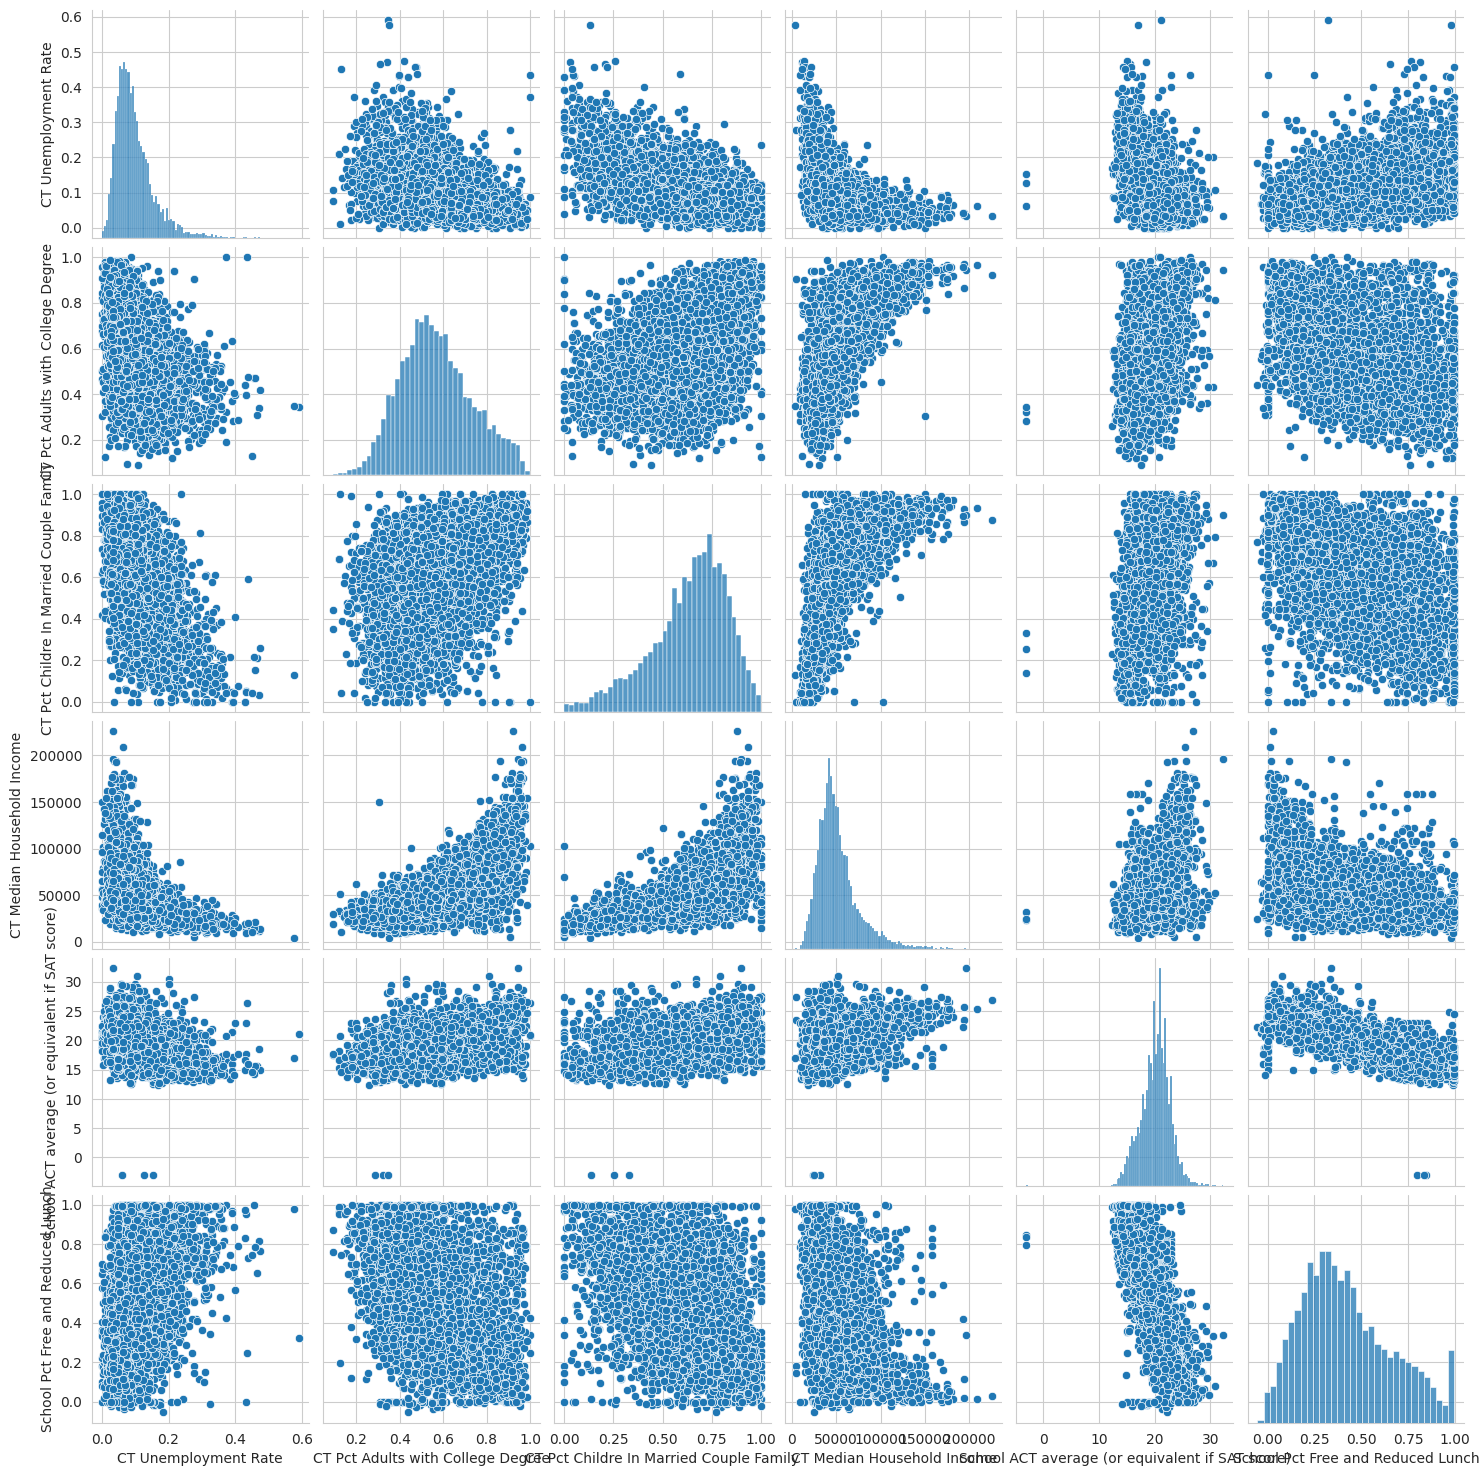

In [ ]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

Adding Regression lines and formating to the pair plot

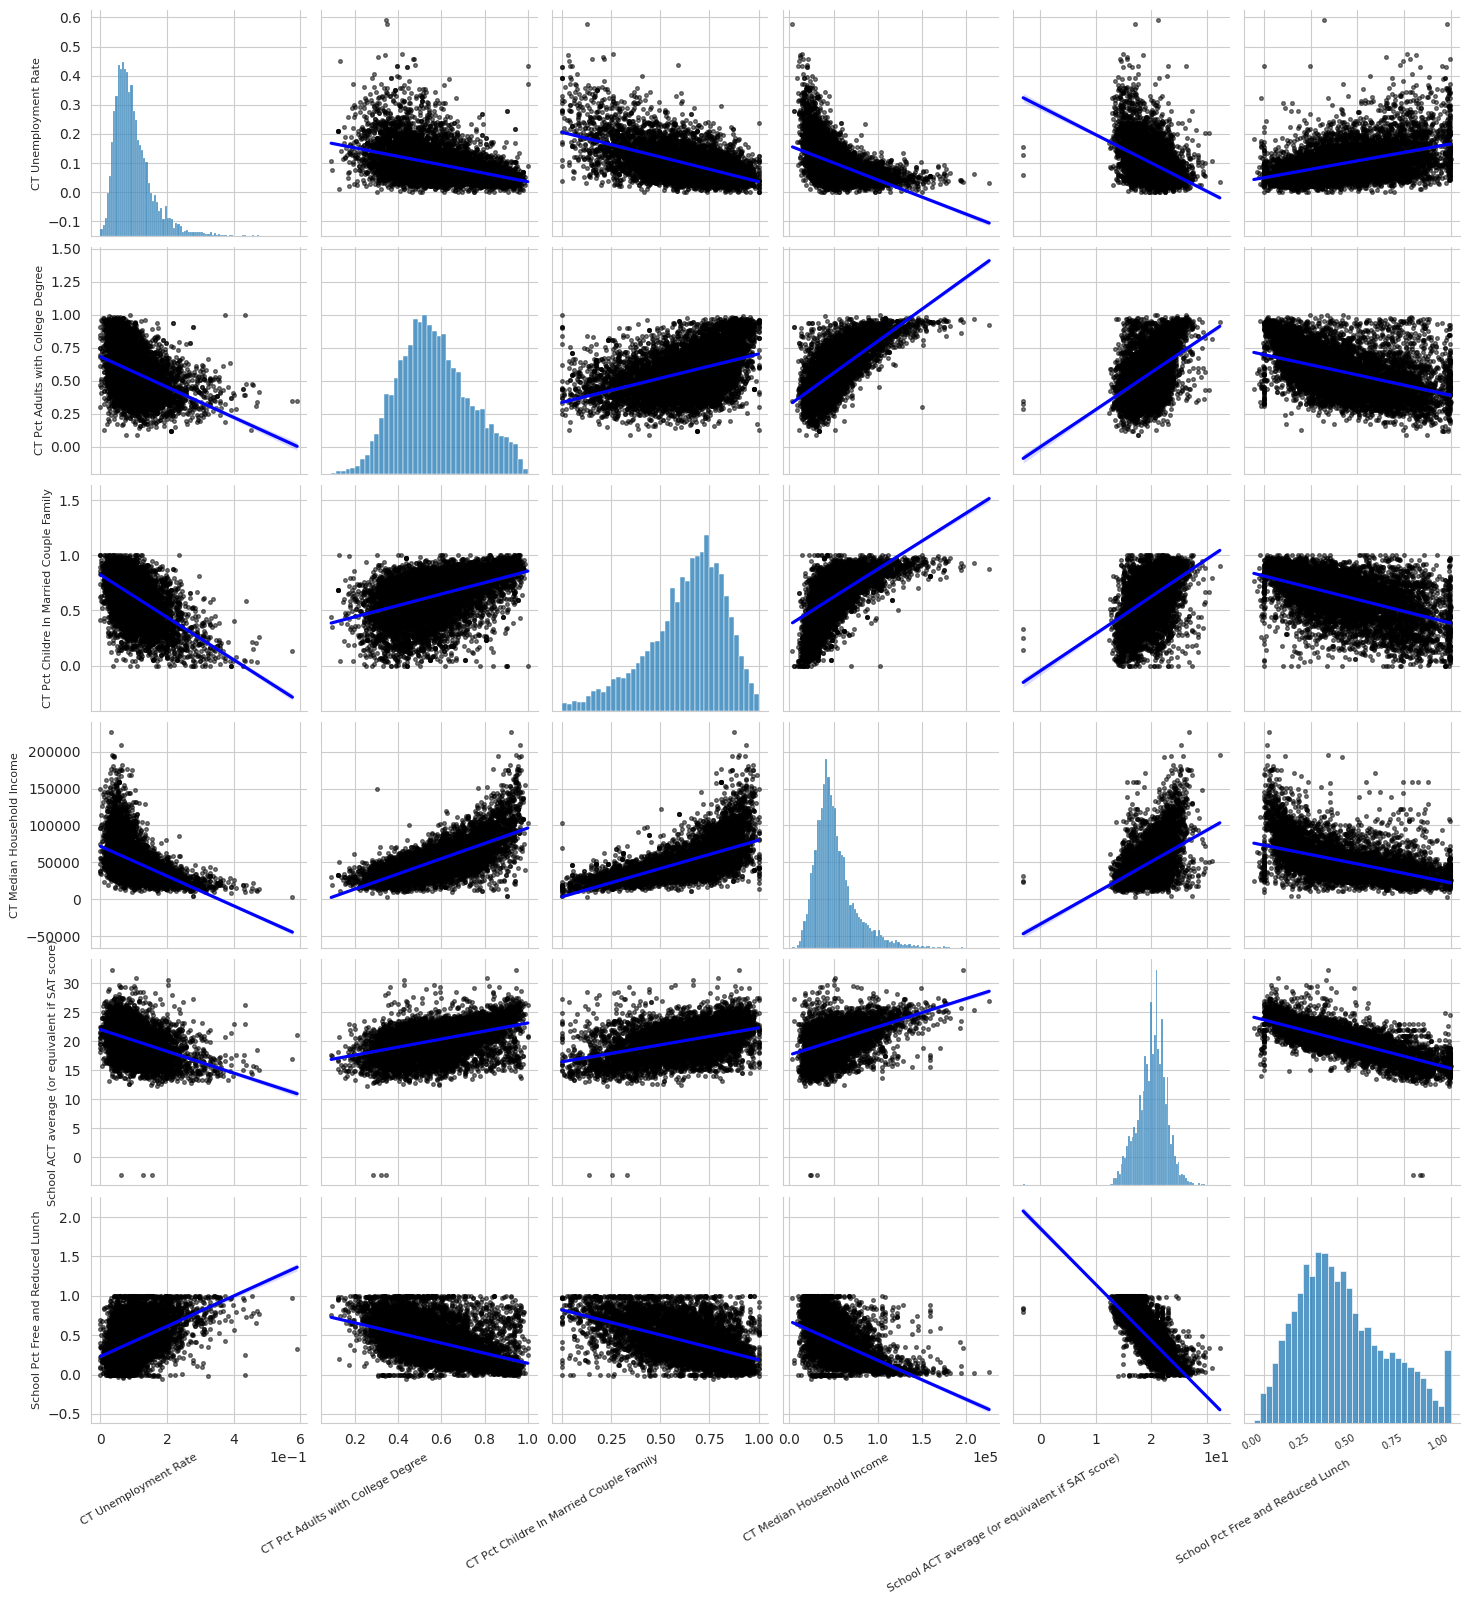

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the school ID column (non-numeric) and create the pair plot
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",  # adds regression lines
    plot_kws={
        "line_kws": {"color": "blue"},     # regression line color
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7}  # scatter point style
    }
)

# Format x-axis and y-axis labels for readability
for ax in fig.axes.flat:
    if ax.get_xlabel():
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # scientific notation
        ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# Rotate x-axis tick labels for clarity
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', fontsize=7)

plt.show()


## Data Preparation


 - selecting relevant subsets of data

In [ ]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

school_information.head()

,SCHOOL_YEAR,NCESSCH,LSTATE,LZIP,SCH_TYPE_TEXT,LEVEL,CHARTER_TEXT
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


- Renaming columns in EDGAP data set to follow best practices and improve readability.

In [ ]:
edgap = edgap.rename(columns={
    "NCESSCH School ID": "id",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Children In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch"
})

edgap.head()

,id,rate_unemployment,percent_college,CT Pct Childre In Married Couple Family,median_income,average_act,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


- Renaming columns in School_info data set to follow best practices and improve readability.

In [ ]:
school_information = school_information.rename(columns={
    "SCHOOL_YEAR": "year",
    "NCESSCH": "id",
    "LSTATE": "state",
    "LZIP": "zip_code",
    "SCH_TYPE_TEXT": "school_type",
    "LEVEL": "school_level",
    "CHARTER_TEXT": "charter"
})

school_information.head()

,year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High,No
1,2016-2017,1.000020e+10,AL,36067,Alternative School,High,No
2,2016-2017,1.000020e+10,AL,36784,Alternative School,High,No
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High,No
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High,No


## Joining both the dataframes

Joining the EdGap and School Information datasets using the common 'id' key. We then convert the 'id' in school_information to an object to match EdGap.


In [ ]:
school_information['id'] = school_information['id'].astype('object')

school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


A left join ensures all EdGap data is retained, even if some schools have no matching record.

In [ ]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [ ]:
df.head()

,id,rate_unemployment,percent_college,CT Pct Childre In Married Couple Family,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       7986 non-null   object 
 1   rate_unemployment                        7972 non-null   float64
 2   percent_college                          7973 non-null   float64
 3   CT Pct Childre In Married Couple Family  7961 non-null   float64
 4   median_income                            7966 non-null   float64
 5   average_act                              7986 non-null   float64
 6   percent_lunch                            7986 non-null   float64
 7   year                                     7898 non-null   object 
 8   state                                    7898 non-null   object 
 9   zip_code                                 7898 non-null   object 
 10  school_type                              7898 no

## Quality check

Before performing any deeper analysis, it’s important to examine the dataset for potential issues.  

In [ ]:
df.describe() #summary statistics

,rate_unemployment,percent_college,CT Pct Childre In Married Couple Family,median_income,average_act,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


In [ ]:
#minimum and maximum values
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,CT Pct Childre In Married Couple Family,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


In [ ]:
import numpy as np

# Replace out-of-range or invalid values with NaN
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [ ]:
#unique categories for school type, level, and charter

print(df['school_type'].value_counts())

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64


In [ ]:
print(df['school_level'].value_counts())


school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64


In [ ]:
print(df['charter'].value_counts())

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64


In [ ]:
# Keep only the high schools in the dataset
df = df.loc[df['school_level'] == 'High']

In [ ]:
# Check for any duplicated rows
df.duplicated().sum()

np.int64(0)

## Identify Missing Values

We will identify missing or invalid data, visualize where data may be incomplete, and decide how to handle missing ACT scores and socioeconomic variables.

In [ ]:
# Count how many values are missing in each column
df.isna().sum().to_frame(name='Number of Missing Values')


,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
CT Pct Childre In Married Couple Family,20
median_income,16
average_act,3
percent_lunch,20
year,0
state,0
zip_code,0


In [ ]:
# Calculate percentage of missing values for each variable
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')


,Percent Missing Values
id,0.00
rate_unemployment,0.17
percent_college,0.15
CT Pct Childre In Married Couple Family,0.28
median_income,0.22
average_act,0.04
percent_lunch,0.28
year,0.00
state,0.00
zip_code,0.00


Let us check which states are represented in our dataset.
This helps identify if the data is complete across all U.S. states or if we are missing data from certain regions.

In [ ]:
# Check how many schools we have per state
df['state'].value_counts()

# Check how many unique states exist
df['state'].nunique()

20

Let us visualize where our data is coming from.
This will help spot potential geographic gaps or underrepresented regions in the dataset.

In [ ]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(
    geo=dict(scope='usa'),
    coloraxis_colorbar=dict(title='Number of Schools')
)

data = dict(
    type='choropleth',
    locations=df['state'].value_counts().index,
    locationmode='USA-states',
    z=df['state'].value_counts().values,
    coloraxis='coloraxis'
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)


The average ACT score is our key response variable for this analysis.
Because we cannot analyze schools without ACT scores, wee will remove rows where average_act is missing.
We will keep other socioeconomic variables.

In [ ]:
# Drop rows where average ACT score is missing
df = df.dropna(subset=['average_act'])

# Recheck missing values after dropping
df.isna().sum().to_frame(name='Number of Missing Values')


,Number of Missing Values
id,0
rate_unemployment,12
percent_college,11
CT Pct Childre In Married Couple Family,20
median_income,16
average_act,0
percent_lunch,20
year,0
state,0
zip_code,0


## Data Imputation

In [ ]:
# Define predictor variables for imputation
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'CT Pct Childre In Married Couple Family', # Corrected column name
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

We will import the IterativeImputer class and initialize it.
This imputer repeatedly models each feature with missing values as a function of other features and fills them in, producing more accurate estimates.

In [ ]:
# Import and initialize the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()


We will identify the numerical columns from the predictor list as only these can be used directly for imputation.

In [ ]:
# Select only numerical predictor columns for imputation
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'CT Pct Childre In Married Couple Family', 'median_income', 'percent_lunch']


imputer engages in learning from the data

In [ ]:
# Learn patterns in the numeric columns
imputer.fit(df.loc[:, numerical_predictors])


IterativeImputer()

Let us replace missing values in the same columns.
We use the .transform() method to perform this replacement, effectively filling the gaps in the dataset.

In [ ]:
# Apply the imputer to fill missing values
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Let us verify that all missing values have been successfully replaced.

In [ ]:
# Check remaining missing values
df.isna().sum().to_frame(name='Number of Missing Values')


,Number of Missing Values
id,0
rate_unemployment,0
percent_college,0
CT Pct Childre In Married Couple Family,0
median_income,0
average_act,0
percent_lunch,0
year,0
state,0
zip_code,0


Let us export the Clean Dataset.

In [ ]:
# Export clean dataset
df.to_csv('education_clean.csv', encoding='utf-8-sig', index=False)

# For Colab: download the CSV
from google.colab import files
files.download('education_clean.csv')
print('Clean dataset exported!')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clean dataset exported!
